<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Получение-данных-свечей" data-toc-modified-id="Получение-данных-свечей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Получение данных свечей</a></span></li><li><span><a href="#Проверка-функици-в-классе" data-toc-modified-id="Проверка-функици-в-классе-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проверка функици в классе</a></span></li><li><span><a href="#Price-Channel-(«Ценовой-канал»)" data-toc-modified-id="Price-Channel-(«Ценовой-канал»)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Price Channel («Ценовой канал»)</a></span></li></ul></div>

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pickle

In [3]:
import open_finam_data
import trad_analysis

In [4]:
# НАстройка отображения графиков
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
import matplotlib.dates as mdates
import pylab
plt.rcParams['figure.figsize'] = (20, 12)

## Получение данных свечей

In [5]:
tolls_path_list = ['HYDR_190101_200430.csv','MOEX_190101_200430.csv','YNDX_190101_200430.csv', 'TATN_190101_200430.csv']
df_dikt = {}
for toll_path in tolls_path_list:
    df = open_finam_data.open('../../input/' + toll_path)
    #  Фильтр дат
    df = df.loc[df.index >= '2020-03-23']
#     df = df.loc[df.index <= '2020-03-14']
    df_dikt[toll_path.split('_')[0]] = df

## Проверка функици в классе

In [6]:
t = trad_analysis.Analysis(df_dikt).get_price_channel(14)

In [7]:
t.df_dikt['HYDR']

,OPEN,HIGH,LOW,CLOSE,VOL,PCH,PCL,PCM
DATE_TIME,,,,,,,,
2020-03-23 10:10:00,0.5151,0.5173,0.5100,0.5116,122939000,NaN,NaN,NaN
2020-03-23 10:20:00,0.5115,0.5198,0.5115,0.5175,62235000,NaN,NaN,NaN
2020-03-23 10:30:00,0.5176,0.5188,0.5170,0.5182,61933000,NaN,NaN,NaN
2020-03-23 10:40:00,0.5182,0.5185,0.5135,0.5155,45527000,NaN,NaN,NaN
2020-03-23 10:50:00,0.5149,0.5169,0.5135,0.5138,20457000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-04-30 16:00:00,0.6287,0.6289,0.6264,0.6264,9823000,0.6315,0.625,0.62825
2020-04-30 16:10:00,0.6267,0.6267,0.6220,0.6235,49422000,0.6303,0.622,0.62615
2020-04-30 16:20:00,0.6235,0.6268,0.6231,0.6260,14481000,0.6303,0.622,0.62615


## Price Channel («Ценовой канал»)

In [16]:
df = df_dikt['HYDR'][-200:]
df 

,OPEN,HIGH,LOW,CLOSE,VOL
DATE_TIME,,,,,
2020-04-24 18:50:00,0.6118,0.6118,0.6118,0.6118,39102000
2020-04-27 10:10:00,0.6133,0.6206,0.6133,0.6206,42327000
2020-04-27 10:20:00,0.6204,0.6219,0.6164,0.6171,24218000
2020-04-27 10:30:00,0.6171,0.6203,0.6169,0.6188,29566000
2020-04-27 10:40:00,0.6187,0.6197,0.6183,0.6192,2595000
...,...,...,...,...,...
2020-04-30 16:00:00,0.6287,0.6289,0.6264,0.6264,9823000
2020-04-30 16:10:00,0.6267,0.6267,0.6220,0.6235,49422000
2020-04-30 16:20:00,0.6235,0.6268,0.6231,0.6260,14481000


Вычисление:

PChi=max([Hi-n;Hi]) – верхняя линия (сопротивления) 

PCli=min([Li-n;Li]) – нижняя линия (поддержки) 

PCmi=(PChi+PCli)/2 – средняя линия 

где i >=n 


In [23]:
# pch = 0
# pcl = 0
# pcm = 0
n = 14
for index in df.index:
    index_num = list(df.index).index(index)
    pch = df.loc[df.index[index_num - n]:index, 'HIGH'].max() #– верхняя линия (сопротивления)
    pcl = df.loc[df.index[index_num - n]:index, 'LOW'].min() # нижняя линия (поддержки)
    pcm = (pch+pcl)/2
    df.loc[index, 'PCH'] = pch
    df.loc[index, 'PCL'] = pcl
    df.loc[index, 'PCM'] = pcm

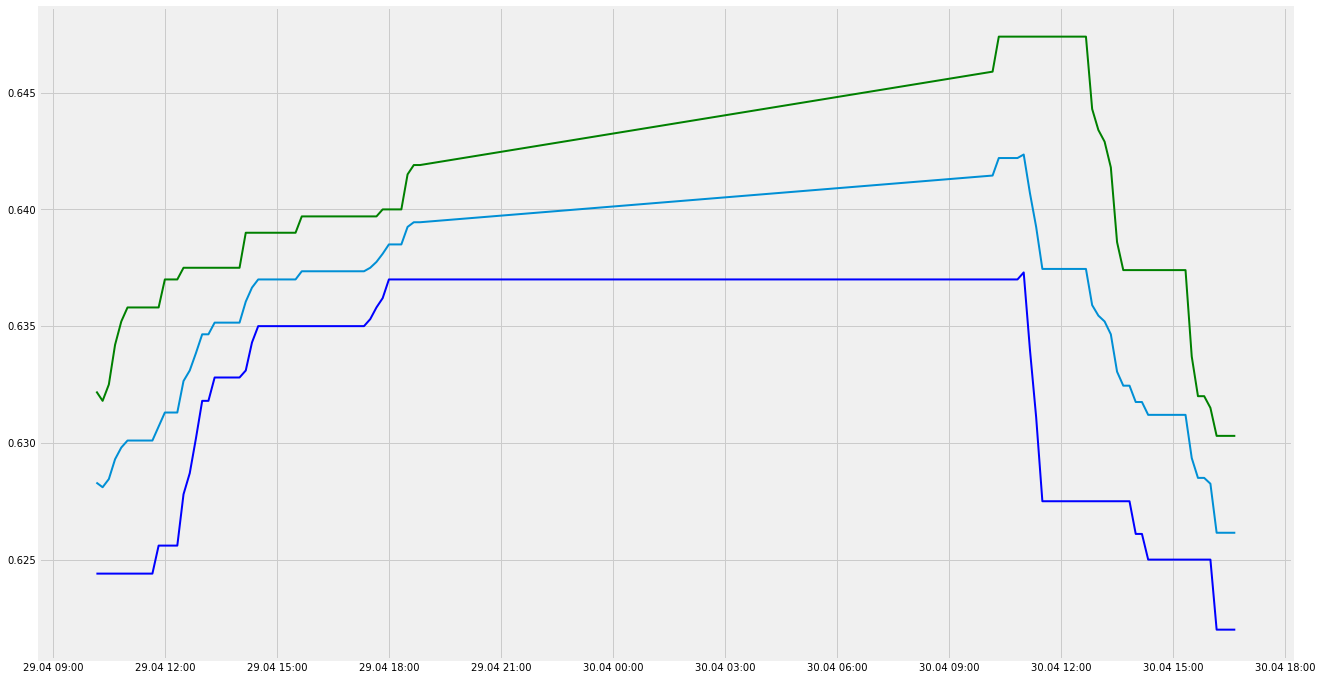

In [24]:
# Сторим график
fig, ax = plt.subplots()
ax = pylab.subplot(1, 1, 1)
# ax.set_title(t.portfel_df)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m %H:%M'))
ax.plot(df[df.index > '2020-04-29 10:00'].PCH,linewidth=2, color='g')
ax.plot(df[df.index > '2020-04-29 10:00'].PCL,linewidth=2, color='b')
ax.plot(df[df.index > '2020-04-29 10:00'].PCM,linewidth=2)
plt.show()